# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn import set_config
set_config(display="diagram")
set_option("display.width", 100)
set_option("display.precision", 3)

# Data Preprocessing

In [2]:
# Load the new dataset
# Load data
df1 = pd.read_csv('file3.csv')
# inspect the dataset
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Ratings,Time,Summary,Text,Score
0,360446,B004LI9YAE,ALDAF4VVLFRHP,Patricia L. Brouillette,0,0,5,1333152000,Worth getting,My cats really love these treats. They come ru...,1
1,284030,B0051COPH6,A240FRPD4MEXND,Phyllis Staff,0,0,5,1343606400,Caregivers Alert -- This Product is Good for E...,Wow! I wish I'd known about this baby food wh...,1
2,466446,B000G6O2QG,A2BLJGGWN8GTXQ,Sean,0,0,5,1325721600,Salty and vinegary!!!,These are the strongest tasting salt and vineg...,1
3,484788,B004P7QDQO,A3MOKEX63Y3SEV,Barbara,1,1,5,1315353600,YUMMY!,The thing that caught my eye about this was th...,1
4,299042,B003YV7ZRI,A3RG19S9KKVF44,Anita,0,1,5,1326672000,Best coffee you can buy,"My son-inlaw loves this coffee, but can't buy ...",1


# Explore the new dataset

In [3]:
# check the dataset for dtat type
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164074 entries, 0 to 164073
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      164074 non-null  int64 
 1   ProductId               164074 non-null  object
 2   UserId                  164074 non-null  object
 3   ProfileName             164066 non-null  object
 4   HelpfulnessNumerator    164074 non-null  int64 
 5   HelpfulnessDenominator  164074 non-null  int64 
 6   Ratings                 164074 non-null  int64 
 7   Time                    164074 non-null  int64 
 8   Summary                 164049 non-null  object
 9   Text                    164074 non-null  object
 10  Score                   164074 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 15.0+ MB


In [4]:
# 0 is negative 
# 1 is positive
df1["Score"].value_counts()

1    82037
0    82037
Name: Score, dtype: int64

In [5]:
# Prepare a subset of dataset
def dataset_reviews(dataframe):
  subset_dataset = dataframe.iloc[:,9:]
  return subset_dataset

In [6]:
dataset = dataset_reviews(df1)
dataset.shape

(164074, 2)

In [7]:
# check the tail of the dataset
dataset.tail()

,Text,Score
164069,We've purchased this water about 5 times and u...,0
164070,I made the mistake of purchasing this bag on A...,0
164071,I bought these for my pregnant wife. They loo...,0
164072,I am not sure why these dried grapes(raisins) ...,0
164073,I suggest you be careful before ordering this ...,0


In [8]:
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
new_stopwords =["all","due","to","on","daily","get","one","also","even","come","work","really","since","try",
               "think","www","still","well","know","get","say","com","stuff","like","maybe","tried","though","used"]
stop.extend(new_stopwords)

In [10]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [11]:
# Data cleaning function
def preprocess(text): 
    text=text.lower()
    text=re.sub('[^0-9a-zA-Z]+',' ',text)# specify a regular expression pattern in the first argument, a new string in the second, and a string to be processed in the third.
    text =re.sub(r'#','',text)
    text = re.sub(r'<>\/','',text)
    text = re.sub(r'br br','',text)
    text = re.sub(r'br','',text)
    text = re.sub(r'href','',text)
    text = re.sub(r'href http','',text)
    text = re.sub(r'http','',text)
    text = re.sub(r'httpwww','',text)
    text = text.split()
    text=[w for w in text if (w not in stop)]
    text=' '.join(text)
    text = nlp(text)
    text =[token.lemma_ for token in text]
    #text = list(map(lambda token: token.lemma_, text))
    text =' '.join(text)
    return text

In [12]:
#clean the review data
dataset['Text'] = dataset['Text'].apply(preprocess)

In [13]:
dataset.tail()

,Text,Score
164069,purchase water 5 time delivery 5 receive new z...,0
164070,make mistake purchase bag amazon subscribe sav...,0
164071,buy pregnant wife look pretty fit nicely purse...,0
164072,sure dry grape raisin label currant one grow e...,0
164073,suggest careful ordering item see cookie worth...,0


# Feature Extraction Using TF-IDF

In [14]:
#Saving best model 
import joblib
#Save the model to disk
#filename = 'tfid500_vector_nlp.sav'
#joblib.dump(word_vector, filename)

In [15]:
#Load the save word vectors and use to tranform data
vect= joblib.load(r"tfid500_vector_nlp.sav")

In [16]:
# Create sparse matrix from the vectorizer
tokenized_features = vect.transform(dataset['Text'])
tokenized_features

<164074x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3010827 stored elements in Compressed Sparse Row format>

In [17]:
#Create a Dataframe of the new features
features = pd.DataFrame(data = tokenized_features.toarray(),columns =vect.get_feature_names_out())
features

,able,absolutely,actually,add,aftertaste,ago,almond,almost,already,alternative,...,wonderful,worth,would,would recommend,write,wrong,year,year old,yes,yet
0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164069,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164070,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.077,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164071,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164072,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Concatenate the new feature dataframe with the initial one
#  and define X and y 
#X = pd.concat([features, new_dataset.loc[:,'char_count':]], axis = 1)
X = features.to_numpy()
y = dataset['Score']

In [19]:
X.shape

(164074, 500)

# Split the data into Train set and Test set

In [ ]:
#Train/test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

In [36]:
#X_train = X_train.reshape(-1,500,1)
#X_train.shape

In [37]:
#X_test = X_test.reshape(-1,500,1)
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Build A Neural Network for Training

In [38]:
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation,SimpleRNN,LSTM
from keras.models import Sequential, load_model
import tensorflow as tf

In [39]:
model = Sequential()
model.add(Dense(256,  input_shape =(500,)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))# See Mean Square Error for train and test data
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               128256    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [40]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4102/4102 [==============================] - 22s 5ms/step - loss: 0.4178 - accuracy: 0.8088 - val_loss: 0.4041 - val_accuracy: 0.8179
Epoch 2/100
4102/4102 [==============================] - 19s 5ms/step - loss: 0.3927 - accuracy: 0.8228 - val_loss: 0.3872 - val_accuracy: 0.8280
Epoch 3/100
4102/4102 [==============================] - 19s 5ms/step - loss: 0.3752 - accuracy: 0.8350 - val_loss: 0.3819 - val_accuracy: 0.8305
Epoch 4/100
4102/4102 [==============================] - 23s 6ms/step - loss: 0.3607 - accuracy: 0.8428 - val_loss: 0.3716 - val_accuracy: 0.8380
Epoch 5/100
4102/4102 [==============================] - 22s 5ms/step - loss: 0.3491 - accuracy: 0.8489 - val_loss: 0.3703 - val_accuracy: 0.8380
Epoch 6/100
4102/4102 [==============================] - 24s 6ms/step - loss: 0.3398 - accuracy: 0.8543 - val_loss: 0.3698 - val_accuracy: 0.8403
Epoch 7/100
4102/4102 [==============================] - 24s 6ms/step - loss: 0.3306 - accuracy: 0.8589 - val_loss: 0.3667 -

In [41]:
prediction =model.predict(X_test)

1026/1026 [==============================] - 3s 2ms/step


In [42]:
prediction=prediction.round()

In [43]:
y_test.to_numpy()

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
y_pred = tf.keras.utils.to_categorical(prediction)
y_pred= np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Evaluate the Model

In [46]:
 from sklearn.metrics import classification_report, confusion_matrix
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

             

              precision    recall  f1-score   support

    negative       0.86      0.86      0.86     16543
    positive       0.86      0.85      0.86     16272

    accuracy                           0.86     32815
   macro avg       0.86      0.86      0.86     32815
weighted avg       0.86      0.86      0.86     32815



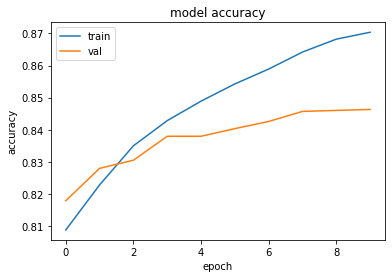

In [52]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'][0:10])
plt.plot(history.history['val_accuracy'][0:10])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

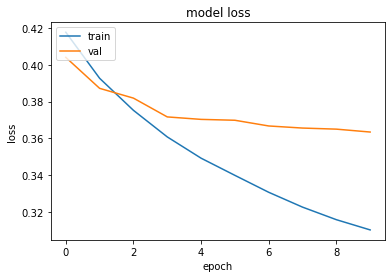

In [51]:
plt.plot(history.history['loss'][0:10])
plt.plot(history.history['val_loss'][0:10])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()